In [8]:
from procfunc import *
from rnog_data.runtable import RunTable #***YOU MAY NEED TO CHANGE THIS***

runType_labels = ['physics','calibration','other']
runtable = RunTable().get_table()

## Re-assign station variable below

In [4]:
#=# Parameters #=#

station=21

#==========

data = getData(station, f'runStatsdata_st{station}_2021-01-01to2025-01-01.csv')
time = data[0]                      #timestamps
run_ids = data[1].astype(int)       #run numbers
trigRate = data[2]                  #trigger rates
run_dt = data[3]                    #run duration (s)
data_dt = data[4]                   #data taking duration (s)

#plotHist(station,trigRate,'Trigger Rate','Hz',0.2)

In [5]:
run_types = [] #for comparison with complete dataset 

#for plotting in separate histograms
sorted_runlists = [[] for t in runType_labels]
sorted_triggers = [[] for t in runType_labels]

for ir,run in enumerate(run_ids):
    rt = getRunType(station,run,runtable)
    run_types.append(rt)

    if rt in runType_labels[:-1]:
        sorted_runlists[runType_labels.index(rt)].append(run)
        sorted_triggers[runType_labels.index(rt)].append(trigRate[ir])
    else:
        sorted_runlists[-1].append(run)
        sorted_triggers[-1].append(trigRate[ir])


The current selection criteria for the good run list will keep all runs with a trigger rate < 2Hz.
Plot saved to TriggerRates_Station21_1runTypes.png


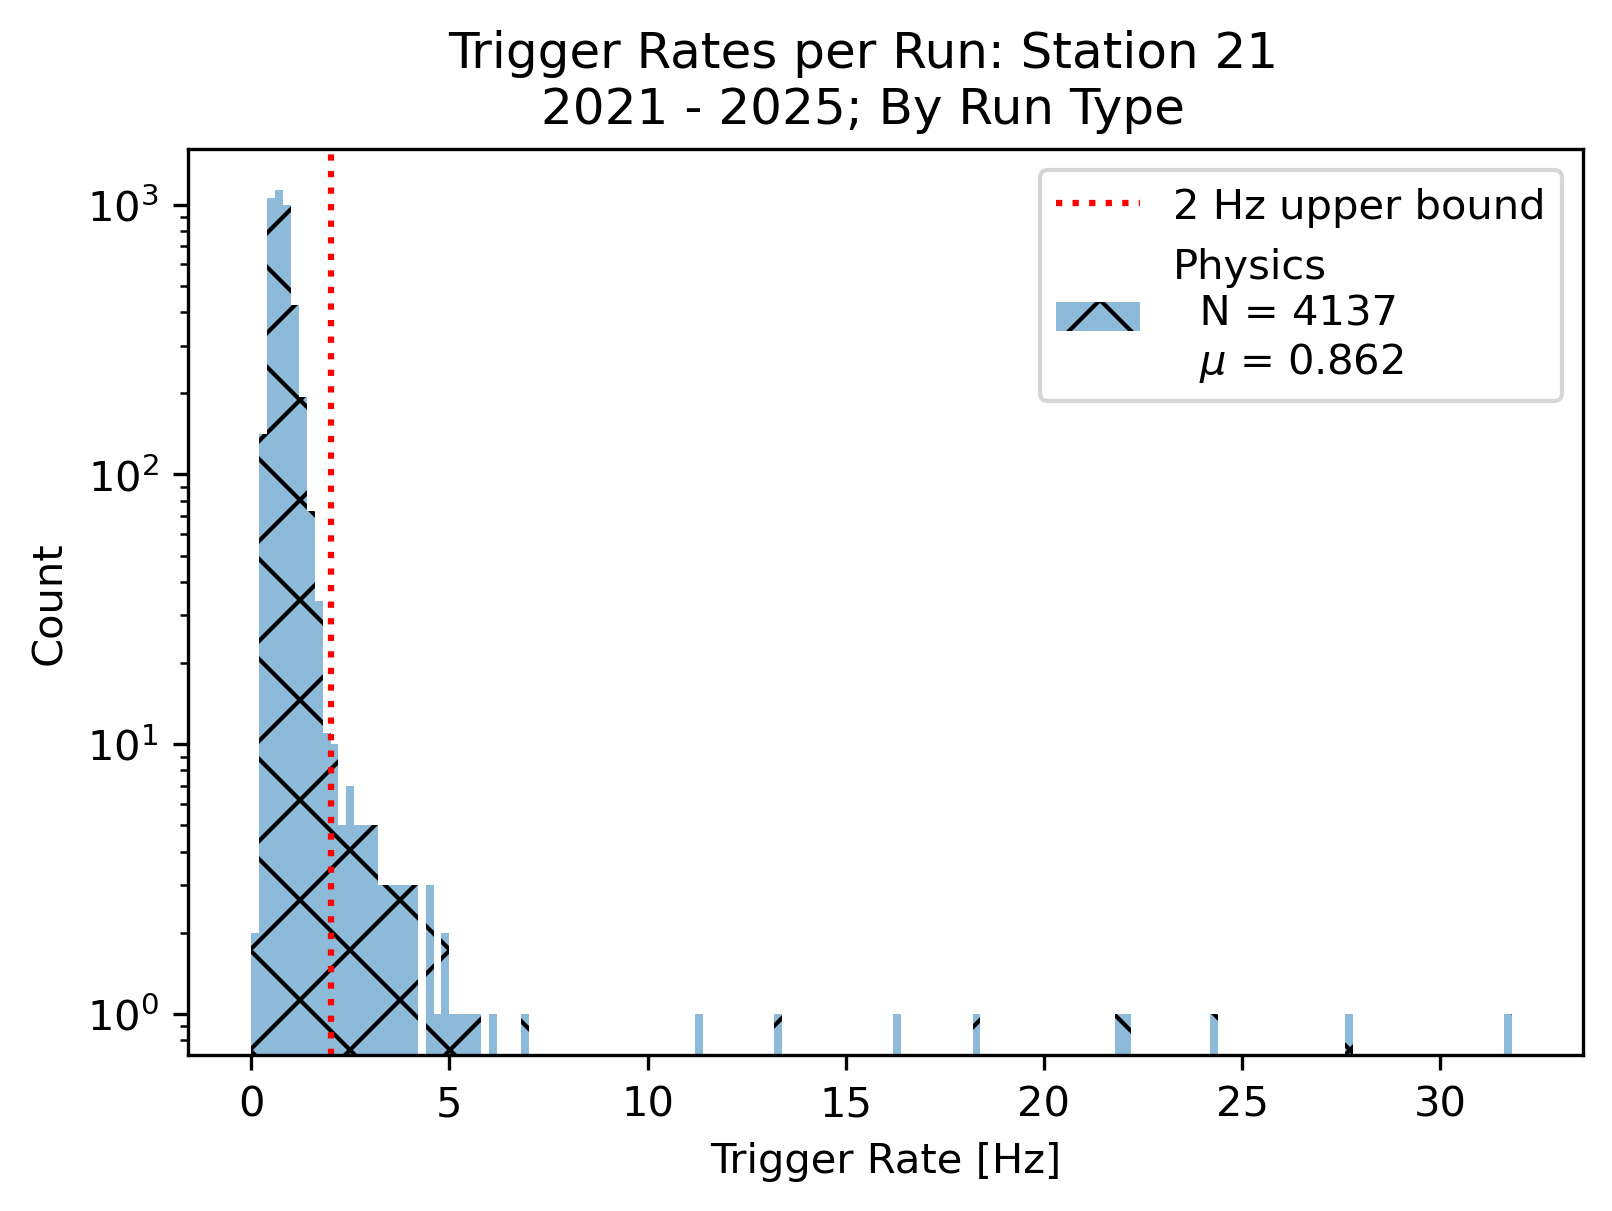

In [7]:
print('The current selection criteria for the good run list will keep all runs with a trigger rate < 2Hz.')
#plotRunTypeHist(station,sorted_triggers,'Trigger Rate','Hz',0.2,runType_labels)  #Plot Physics, Calibration and other runs; for reference
plotRunTypeHist(station,sorted_triggers,'Trigger Rate','Hz',0.2,runType_labels,physonly=True) #Only 'Physics' runs will be included in the analysis